Number of events detected: 44
Skipping event 0 due to error: object of type 'NoneType' has no len()
Skipping event 1 due to error: object of type 'NoneType' has no len()
Skipping event 2 due to error: object of type 'NoneType' has no len()
Skipping event 5 due to error: could not broadcast input array from shape (14,) into shape (0,)
Skipping event 9 due to error: could not broadcast input array from shape (31,) into shape (0,)
Skipping event 13 due to error: could not broadcast input array from shape (69,) into shape (0,)
Skipping event 15 due to error: could not broadcast input array from shape (71,) into shape (0,)
Skipping event 17 due to error: could not broadcast input array from shape (75,) into shape (0,)
Skipping event 20 due to error: could not broadcast input array from shape (96,) into shape (0,)
Skipping event 21 due to error: negative dimensions are not allowed
Skipping event 27 due to error: could not broadcast input array from shape (136,) into shape (0,)
Skipping event

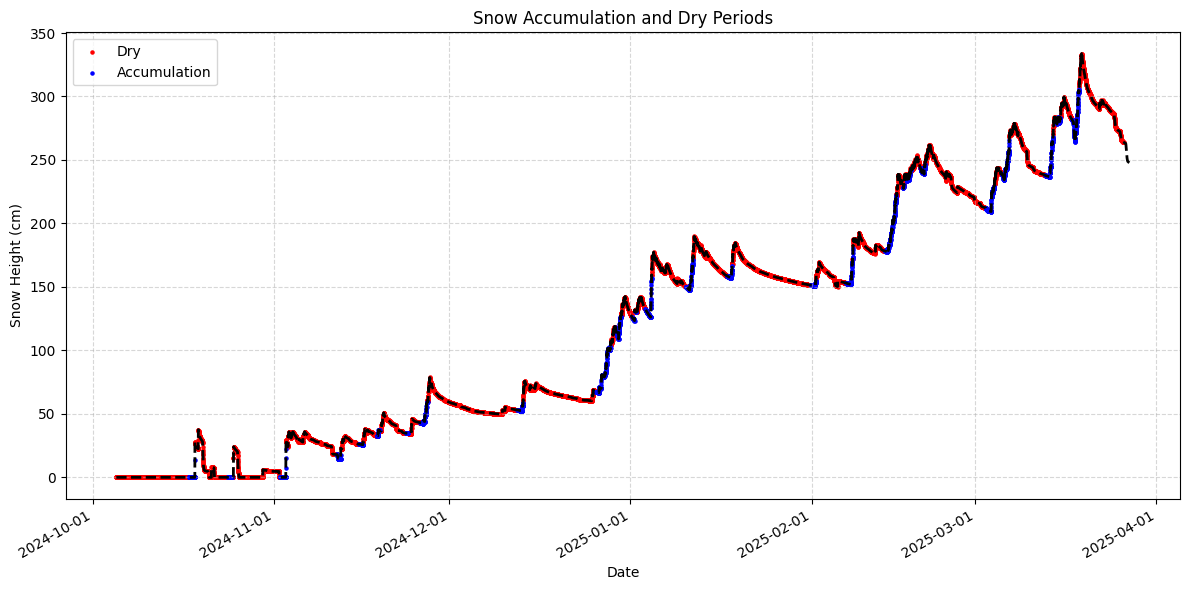

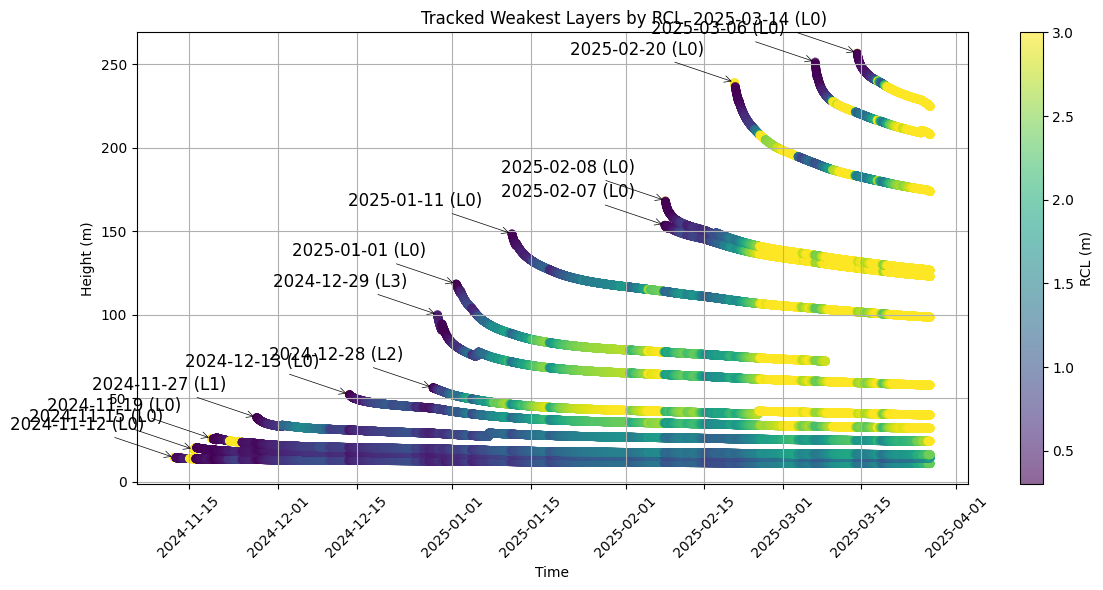

In [1]:
# main.py
# Main script to load profile, compute HST, identify accumulation periods, and plot weak layers

from config import PRO_FILE
from data_loader import load_profile, extract_variables
from utils import compute_hst, extract_weak_layers_by_event, identify_accumulation_periods, identify_accumulation_periods_old, track_layers,get_number_events, track_all_layers_xr, parse_gtype
from plotting import plot_hst_and_periods, plot_seasonal_sn38, plot_weak_layers_by_event
import matplotlib.pyplot as plt
import numpy as np
import pickle

#load profile data
pro = load_profile(PRO_FILE)

# Extract variables from the profile
# This function should return a dictionary with keys like 'ht', 'dates', 'id',
# 'rcl', 'gt', 'rho', 'sn38', etc.
vars = extract_variables(pro)

# Compute the historical snow height (HST)
hst = compute_hst(vars['ht'])


# Identify accumulation and dry periods
# Note: You can use either the new or old method for identifying accumulation periods.
dry_indices, accum_indices = identify_accumulation_periods_old(hst)
#labels = identify_accumulation_periods(hst)
#accum_indices = np.where(labels == 1)[0]
#dry_indices = np.where(labels == 0)[0]

# Plot the historical snow height and accumulation/dry periods
plot_hst_and_periods(vars['dates'], hst, dry_indices, accum_indices)

# Extract the dates for dry and accumulation periods
num_events, accum_end_index =get_number_events(accum_indices)
print(f"Number of events detected: {num_events}")

#Track all layers from one event
#DEPRECATED: This function is now replaced by track_all_layers_xr
#ds = track_layers(accum_indices, accum_end_index, 0, vars['id'], vars['rcl'], vars['gt'], vars['rho'], vars['sn38'], vars['ht'], vars['dates'])

#Track all layers for accumulation events periods
ds_accum = track_all_layers_xr(accum_indices, accum_end_index, vars['id'], vars['rcl'], vars['gt'], vars['rho'], vars['sn38'],vars['shear_strength'], vars['ht'], vars['dates'])

# Save ds_accum to a file (e.g., using pickle)
#with open('ds_accum.pkl', 'wb') as f:
#    pickle.dump(ds_accum, f)

#Extract the weak layers by event
#weak_layers_dry = extract_weak_layers_by_event(ds_dry)
weak_layers_accum  = extract_weak_layers_by_event(ds_accum)

# Save weak_layers_accum to a file (e.g., using pickle)
with open('weak_layers_accum.pkl', 'wb') as f:
    pickle.dump(weak_layers_accum, f)

#Plot the weak layers for the entire season
plot_weak_layers_by_event(weak_layers_accum, ds_accum, fig_name='accum_Layers_CCL_layer.png')
#plot_weak_layers_by_event(weak_layers_dry, ds_dry, fig_name='dry_Layers_CCL_layer.png')

In [80]:
idx =10000
tmp = vars['gt'][idx]
hst = vars['ht'][idx]
date_test = vars['dates'][idx]
gt_primary, _, _ = parse_gtype(tmp)  # shape: (time, layer)

print(gt_primary)
print(hst)
print(vars['dates'])

[7. 7. 7. 7. 7. 7. 9. 9. 5. 9. 9. 9. 7. 7. 9. 9. 9. 4. 9. 7. 7. 9. 4. 3.
 3. 9. 9. 7. 9. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 4. 4. 3. 3. 3. 4. 4. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 4. 4.
 4. 6. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
[  0.     2.25   4.8    7.77   9.9   11.47  11.78  13.78  15.75  16.14
  18.06  19.64  20.45  22.68  23.46  25.78  27.71  29.72  31.26  33.64
  35.37  35.88  36.21  37.21  38.76  39.58  41.59  43.46  44.47  44.76
  46.83  49.04  50.64  52.66  55.1   57.19  58.85  61.24  63.56  64.76
  67.06  68.63  70.04  71.55  72.74  75.    76.57  78.43  80.05  81.92
  83.87  84.43  85.95  87.56  90.14  92.52  94.04  96.03  98.6  100.36
 101.26 102.96 104.69 105.96 108.3  110.05 111.22 112.99 114.19 115.79
 118.18 120.63 122.33 123.89 124.13 125.3  125.83 126.91 128.68 131.08
 132.66 135.07 137.56 139.38 140.98 143.11 145.15 146.28 148.05 150.22
 151.44 152.82 154.64 156.27 159.64]
[datetime.datetime(2024, 10, 5, 0, 0)

Failed to parse grain code
Skipping invalid entry at 0
Failed to parse grain code
Skipping invalid entry at 1
Failed to parse grain code
Skipping invalid entry at 2
Failed to parse grain code
Skipping invalid entry at 3
Failed to parse grain code
Skipping invalid entry at 4
Failed to parse grain code
Skipping invalid entry at 5
Failed to parse grain code
Skipping invalid entry at 6
Failed to parse grain code
Skipping invalid entry at 7
Failed to parse grain code
Skipping invalid entry at 8
Failed to parse grain code
Skipping invalid entry at 9
Failed to parse grain code
Skipping invalid entry at 10
Failed to parse grain code
Skipping invalid entry at 11
Failed to parse grain code
Skipping invalid entry at 12
Failed to parse grain code
Skipping invalid entry at 13
Failed to parse grain code
Skipping invalid entry at 14
Failed to parse grain code
Skipping invalid entry at 15
Failed to parse grain code
Skipping invalid entry at 16
Failed to parse grain code
Skipping invalid entry at 17
Fa

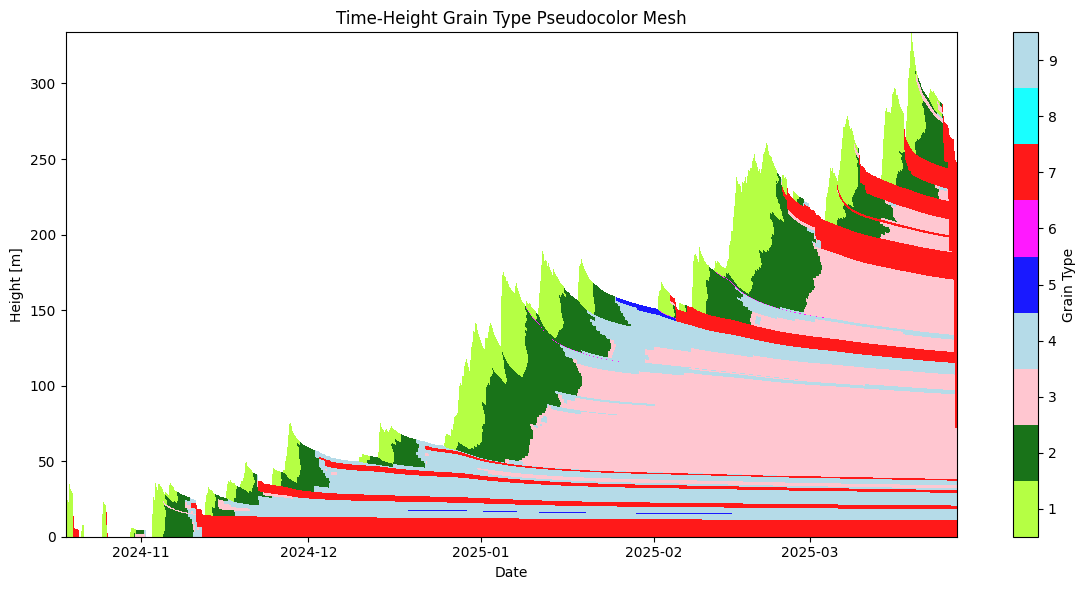

In [89]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

datetime = vars['dates']
hst = vars['ht']
Z = vars['gt']
deltat = datetime[1] - datetime[0]

# Color map for grain types
cgt = ['greenyellow', 'darkgreen', 'pink', 'lightblue', 'blue', 'magenta', 'red', 'cyan', 'lightblue']
cmap = mcolors.ListedColormap(cgt)
vmin = 0.5
vmax = len(cmap.colors) + 0.5

fig, ax = plt.subplots(figsize=(12, 6))

for cnt, dt in enumerate(datetime):
    if cnt >= len(hst) or cnt >= len(Z):
        continue

    heights = hst[cnt]
    values,_,_ = parse_gtype(Z[cnt])

    if len(heights) < 2 or len(values) != len(heights) - 1:
        print(f"Skipping invalid entry at {cnt}")
        continue

    # Create 2D grids for this vertical column
    x_edges = [dt, dt + deltat]
    y_edges = heights  # already edges for vertical bins

    # Meshgrid for 2xN rectangular strip
    X, Y = np.meshgrid(x_edges, y_edges)

    # C must be (M, N) = (len(y_edges)-1, len(x_edges)-1)
    C = np.array(values).reshape(len(y_edges) - 1, 1)

    try:
        cb = ax.pcolormesh(X, Y, C, cmap=cmap, vmin=vmin, vmax=vmax, shading='flat', alpha=0.9)
    except Exception as e:
        print(f"Error at time index {cnt}: {e}")
        continue

ax.set_xlabel("Date")
ax.set_ylabel("Height [m]")
fig.colorbar(cb, ax=ax, label="Grain Type")
plt.title("Time-Height Grain Type Pseudocolor Mesh")
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import os

def plot_grain_type_with_weak_layers(vars, weak_layers_by_event, fig_name='grain_and_weak_layers.png', start_date=None, end_date=None):
    """
    Plot grain type pcolormesh with overlaid weak layers.

    Parameters:
    - vars: dict with keys 'dates', 'ht', 'gt'
    - weak_layers_by_event: dict of weak layer tracking info
    - fig_name: filename to save the figure
    """
    
    datetime = vars['dates']
    hst = vars['ht']
    Z = vars['gt']
    deltat = datetime[1] - datetime[0]

    # Grain type colormap
    cgt = ['greenyellow', 'darkgreen', 'pink', 'lightblue', 'blue', 'magenta', 'red', 'cyan', 'lightblue']
    cmap_gt = mcolors.ListedColormap(cgt)
    vmin = 0.5
    vmax = len(cmap_gt.colors) + 0.5

    fig, ax = plt.subplots(figsize=(14, 7))

    # Plot grain type mesh
    for cnt, dt in enumerate(datetime):
        if cnt >= len(hst) or cnt >= len(Z):
            continue

        heights = hst[cnt]
        values, _, _ = parse_gtype(Z[cnt])

        if len(heights) < 2 or len(values) != len(heights) - 1:
            continue

        x_edges = [dt, dt + deltat]
        y_edges = heights

        X, Y = np.meshgrid(x_edges, y_edges)
        C = np.array(values).reshape(len(y_edges) - 1, 1)

        try:
            cb = ax.pcolormesh(X, Y, C, cmap=cmap_gt, vmin=vmin, vmax=vmax, shading='flat', alpha=0.9)
        except Exception as e:
            print(f"Error at time index {cnt}: {e}")
            continue

    # Plot weak layers
    for event, data in weak_layers_by_event.items():
        time = data["time"]
        rcl = data["rcl"]
        ht = data["ht"]
        layer_idx = data["layer_idx"]

        # Mask invalid RCL values
        rcl_clean = np.where(rcl >= 0, rcl, np.nan)
        ht_clean = np.where(np.isnan(rcl_clean), np.nan, ht)

        rcl_vals = rcl_clean[time_mask]
        ht_vals = ht_clean[time_mask]
        t_vals = time[time_mask]

        # Normalize RCL to 0–1
        if np.nanmax(rcl_vals) > 0:
            normed_rcl = np.clip(rcl_vals / np.nanmax(rcl_vals), 0, 1)
        else:
            normed_rcl = np.ones_like(rcl_vals)

        # Invert: RCL=0 → alpha=1.0 (dark), RCL=max → alpha=0.0 (light)
        alphas = 1.0 - normed_rcl

        # Plot black points with alpha
        for t, h, a in zip(t_vals, ht_vals, alphas):
            if np.isnan(h): continue
            ax.plot(t, h, marker='o', color='black', markersize=5, alpha=a, label='_nolegend_')


        # Annotate the start point
        valid_idx = np.where(~np.isnan(rcl_clean))[0]
        if valid_idx.size > 0:
            start_idx = valid_idx[0]
            start_time = time[start_idx]
            start_ht = ht[start_idx]
            gtype_map = {4: "Fx", 5: "DH", 6: "SH"}
            gtype_label = gtype_map.get(layer_idx, f"L{layer_idx}")

            ax.annotate(
                f"{np.datetime_as_string(start_time, unit='D')} ({gtype_label})",
                (start_time, start_ht),
                textcoords="offset points",
                xytext=(-70, 20),
                ha='center',
                fontsize=10,
                color='black',
                arrowprops=dict(arrowstyle='->', color='black', lw=0.5)
            )

    # Optional: overlay HST line (last snow height at each time)
    if hst is not None and datetime is not None:
        try:
            hst_surface = [ht[-1] for ht in hst if len(ht) > 0]
            valid_dates = [datetime[i] for i in range(len(hst)) if len(hst[i]) > 0]
            ax.plot(valid_dates, hst_surface, 'k--', label='HST surface', linewidth=1.5)
        except Exception as e:
            print("Warning: Could not plot HST line —", e)

    # Colorbars and labels
    cbar1 = fig.colorbar(cb, ax=ax, label="Grain Type")
    cbar2 = fig.colorbar(sc, ax=ax, label="RCL (m)")

    ax.set_xlabel("Time")
    ax.set_ylabel("Height (m)")
    ax.set_title("Grain Type and Tracked Weak Layers")
    ax.legend()
    ax.grid(True)
    fig.autofmt_xdate()
    plt.tight_layout()

    plt.savefig(fig_name, dpi=300, bbox_inches='tight')
    plt.show()


In [94]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import os

def plot_grain_type_with_weak_layers(
    vars,
    weak_layers_by_event,
    fig_name='grain_and_weak_layers.png',
    start_date=None,
    end_date=None
):
    """
    Plot grain type pcolormesh with overlaid weak layers.

    Parameters:
    - vars: dict with keys 'dates', 'ht', 'gt'
    - weak_layers_by_event: dict of weak layer tracking info
    - fig_name: filename to save the figure
    - start_date, end_date: optional datetime64-like bounds
    """

    # Convert to datetime64 for safe slicing
    all_dates = np.array(vars['dates'])
    hst = np.array(vars['ht'], dtype=object)
    Z = np.array(vars['gt'], dtype=object)

    if start_date is not None:
        start_date = np.datetime64(start_date)
    else:
        start_date = all_dates[0]

    if end_date is not None:
        end_date = np.datetime64(end_date)
    else:
        end_date = all_dates[-1]

    # Mask the time range
    mask = (all_dates >= start_date) & (all_dates <= end_date)
    datetime = all_dates[mask]
    hst = hst[mask]
    Z = Z[mask]

    if len(datetime) == 0:
        raise ValueError("No data in selected date window.")

    deltat = datetime[1] - datetime[0]

    # Grain type colormap
    cgt = ['greenyellow', 'darkgreen', 'pink', 'lightblue', 'blue', 'magenta', 'red', 'cyan', 'lightblue']
    cmap_gt = mcolors.ListedColormap(cgt)
    vmin = 0.5
    vmax = len(cmap_gt.colors) + 0.5

    fig, ax = plt.subplots(figsize=(14, 7))

    # Plot grain type mesh
    for cnt, dt in enumerate(datetime):
        if cnt >= len(hst) or cnt >= len(Z):
            continue

        heights = hst[cnt]
        values, _, _ = parse_gtype(Z[cnt])

        if len(heights) < 2 or len(values) != len(heights) - 1:
            continue

        x_edges = [dt, dt + deltat]
        y_edges = heights

        X, Y = np.meshgrid(x_edges, y_edges)
        C = np.array(values).reshape(len(y_edges) - 1, 1)

        try:
            cb = ax.pcolormesh(X, Y, C, cmap=cmap_gt, vmin=vmin, vmax=vmax, shading='flat', alpha=0.9)
        except Exception as e:
            print(f"Error at time index {cnt}: {e}")
            continue


Failed to parse grain code
Failed to parse grain code
Failed to parse grain code
Failed to parse grain code
Failed to parse grain code
Failed to parse grain code
Failed to parse grain code
Failed to parse grain code
Failed to parse grain code
Failed to parse grain code
Failed to parse grain code
Failed to parse grain code
Failed to parse grain code
Failed to parse grain code
Failed to parse grain code
Failed to parse grain code
Failed to parse grain code
Failed to parse grain code
Failed to parse grain code
Failed to parse grain code
Failed to parse grain code
Failed to parse grain code
Failed to parse grain code
Failed to parse grain code
Failed to parse grain code
Failed to parse grain code
Failed to parse grain code
Failed to parse grain code
Failed to parse grain code
Failed to parse grain code
Failed to parse grain code
Failed to parse grain code
Failed to parse grain code
Failed to parse grain code
Failed to parse grain code
Failed to parse grain code
Failed to parse grain code
F

/var/folders/t2/dv36bwgd4qzf9cp4cz8yth8c0000gn/T/ipykernel_9244/3718444250.py:105: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/var/folders/t2/dv36bwgd4qzf9cp4cz8yth8c0000gn/T/ipykernel_9244/3718444250.py:107: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(fig_name, dpi=300, bbox_inches='tight')
/Users/travismorrison/Documents/GitHub/U-CAAST/.venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


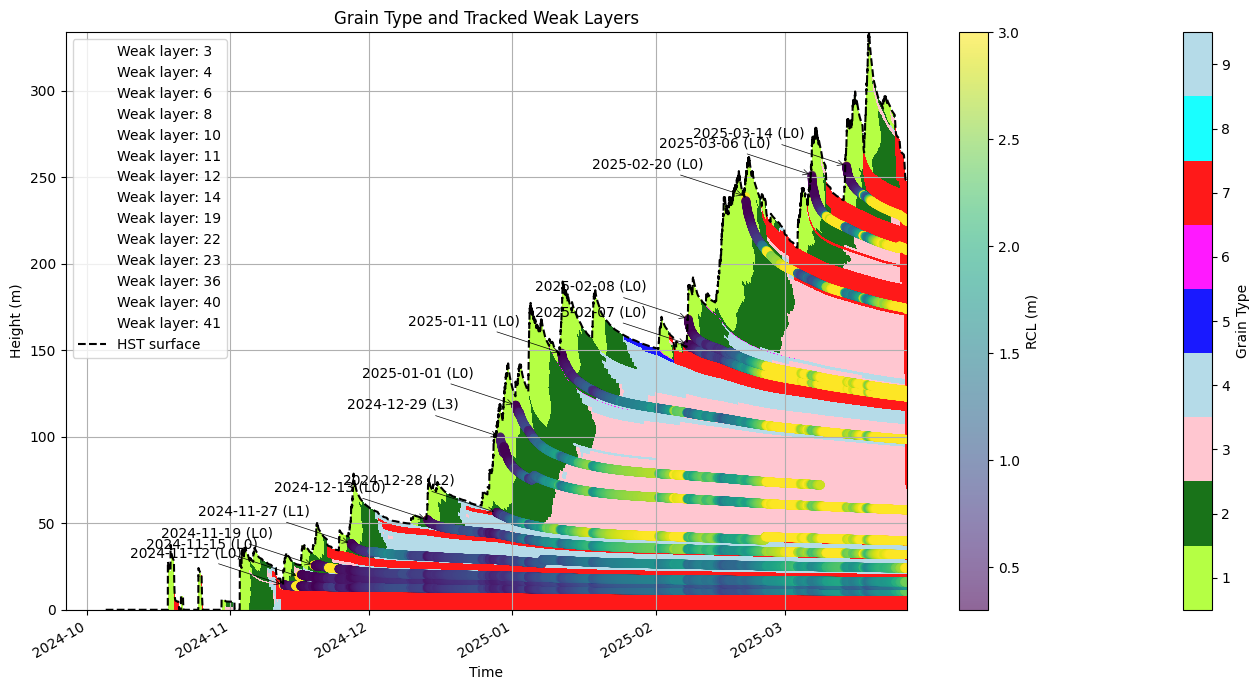

In [96]:
plot_grain_type_with_weak_layers(vars, weak_layers_accum, fig_name='grain_and_layers.png')


In [6]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import os
from matplotlib.patches import Patch

def plot_grain_type_with_weak_layers_4(
    vars,
    weak_layers_by_event,
    fig_name='grain_and_weak_layers.png',
    start_date=None,
    end_date=None
):
    """
    Plot grain type pcolormesh with overlaid weak layers shaded by RCL.

    Parameters:
    - vars: dict with keys 'dates', 'ht', 'gt'
    - weak_layers_by_event: dict of weak layer tracking info
    - fig_name: filename to save the figure
    - start_date, end_date: optional datetime64-like bounds
    """

    # --- Normalize dates ---
    all_dates = np.array(vars['dates'], dtype='datetime64[ns]')
    hst = np.array(vars['ht'], dtype=object)
    Z = np.array(vars['gt'], dtype=object)

    # Convert start/end dates to datetime64
    if start_date is not None:
        start_date = np.datetime64(start_date, 'ns')
    else:
        start_date = all_dates[0]

    if end_date is not None:
        end_date = np.datetime64(end_date, 'ns')
    else:
        end_date = all_dates[-1]

    # Filter date window
    mask = (all_dates >= start_date) & (all_dates <= end_date)
    datetime = all_dates[mask]
    hst = hst[mask]
    Z = Z[mask]

    if len(datetime) == 0:
        raise ValueError("No data in selected date window.")

    deltat = datetime[1] - datetime[0]

    # Grain type colormap
    cgt = ['greenyellow', 'darkgreen', 'pink', 'lightblue', 'blue', 'magenta', 'red', 'cyan', 'lightblue']
    cmap_gt = mcolors.ListedColormap(cgt)
    vmin = 0.5
    vmax = len(cmap_gt.colors) + 0.5

    fig, ax = plt.subplots(figsize=(14, 7))

    # --- Plot grain type pcolormesh ---
    for cnt, dt in enumerate(datetime):
        if cnt >= len(hst) or cnt >= len(Z):
            continue

        heights = hst[cnt]
        values,_,_ = parse_gtype(Z[cnt])

        if len(heights) < 2 or len(values) != len(heights) - 1:
            continue

        x_edges = [dt, dt + deltat]
        y_edges = heights

        X, Y = np.meshgrid(x_edges, y_edges)
        C = np.array(values).reshape(len(y_edges) - 1, 1)

        try:
            cb = ax.pcolormesh(X, Y, C, cmap=cmap_gt, vmin=vmin, vmax=vmax, shading='flat', alpha=0.9)
        except Exception as e:
            print(f"Error at time index {cnt}: {e}")
            continue

    # --- Overlay weak layers ---
    for event, data in weak_layers_by_event.items():
        time = np.array(data["time"], dtype='datetime64[ns]')
        rcl = np.array(data["rcl"])
        ht = np.array(data["ht"])
        layer_idx = data["layer_idx"]

        # Filter to current time window
        time_mask = (time >= start_date) & (time <= end_date)
        if not np.any(time_mask):
            continue

        rcl_clean = np.where(rcl >= 0, rcl, np.nan)
        ht_clean = np.where(np.isnan(rcl_clean), np.nan, ht)

        rcl_vals = rcl_clean[time_mask]
        ht_vals = ht_clean[time_mask]
        t_vals = time[time_mask]

        if len(rcl_vals) == 0:
            continue

        # Only consider RCL values < 1
        valid_mask = (rcl_vals < 1) & ~np.isnan(rcl_vals)
        if not np.any(valid_mask):
            continue  # Skip if nothing to plot

        rcl_sub = rcl_vals[valid_mask]
        ht_sub = ht_vals[valid_mask]
        t_sub = t_vals[valid_mask]

        # Normalize and invert RCL (0 = dark, just below 1 = light)
        normed_rcl = rcl_sub / 1.0  # Since we know max = 1
        alphas = 1.0 - normed_rcl

        # Plot only points with RCL < 1
        for t, h, a in zip(t_sub, ht_sub, alphas):
            if np.isnan(h): continue
            ax.plot(t, h, marker='o', color='black', markersize=5, alpha=a, label='_nolegend_')


        # Annotate first valid point
        valid_idx = np.where(~np.isnan(rcl_vals))[0]
        if valid_idx.size > 0:
            start_idx = valid_idx[0]
            start_time = t_vals[start_idx]
            start_ht = ht_vals[start_idx]
            gtype_map = {4: "Fx", 5: "DH", 6: "SH"}
            gtype_label = gtype_map.get(layer_idx, f"L{layer_idx}")

            ax.annotate(
                f"{np.datetime_as_string(start_time, unit='D')} ({gtype_label})",
                (start_time, start_ht),
                textcoords="offset points",
                xytext=(-70, 20),
                ha='center',
                fontsize=10,
                color='black',
                arrowprops=dict(arrowstyle='->', color='black', lw=0.5)
            )

    # --- Plot snow surface height line ---
    try:
        hst_surface = [ht[-1] for ht in hst if len(ht) > 0]
        valid_dates = [datetime[i] for i in range(len(hst)) if len(hst[i]) > 0]
        ax.plot(valid_dates, hst_surface, 'k--', label='HST surface', linewidth=1.5)
    except Exception as e:
        print("Warning: Could not plot HST line —", e)

    # --- Final plot formatting ---
    fig.colorbar(cb, ax=ax, label="Grain Type")
    ax.set_xlabel("Time")
    ax.set_ylabel("Height (m)")
    ax.set_title("Grain Type and Tracked Weak Layers (Shaded by RCL)")
    ax.grid(True)
    fig.autofmt_xdate()

    # Custom legend for weak layers and HST
    #ax.legend(handles=[
    #    Patch(color='black', alpha=1.0, label='Low RCL (critical)'),
    #    Patch(color='black', alpha=0.3, label='High RCL (less critical)'),
    #    Patch(color='black', linestyle='--', label='HST surface')
    #])

    plt.tight_layout()
    plt.savefig(fig_name, dpi=300, bbox_inches='tight')
    plt.show()


Failed to parse grain code
Failed to parse grain code
Failed to parse grain code
Failed to parse grain code
Failed to parse grain code
Failed to parse grain code
Failed to parse grain code
Failed to parse grain code
Failed to parse grain code
Failed to parse grain code
Failed to parse grain code
Failed to parse grain code
Failed to parse grain code
Failed to parse grain code
Failed to parse grain code
Failed to parse grain code
Failed to parse grain code
Failed to parse grain code
Failed to parse grain code
Failed to parse grain code
Failed to parse grain code
Failed to parse grain code
Failed to parse grain code
Failed to parse grain code
Failed to parse grain code
Failed to parse grain code
Failed to parse grain code
Failed to parse grain code
Failed to parse grain code
Failed to parse grain code
Failed to parse grain code
Failed to parse grain code
Failed to parse grain code
Failed to parse grain code
Failed to parse grain code
Failed to parse grain code
Failed to parse grain code
F

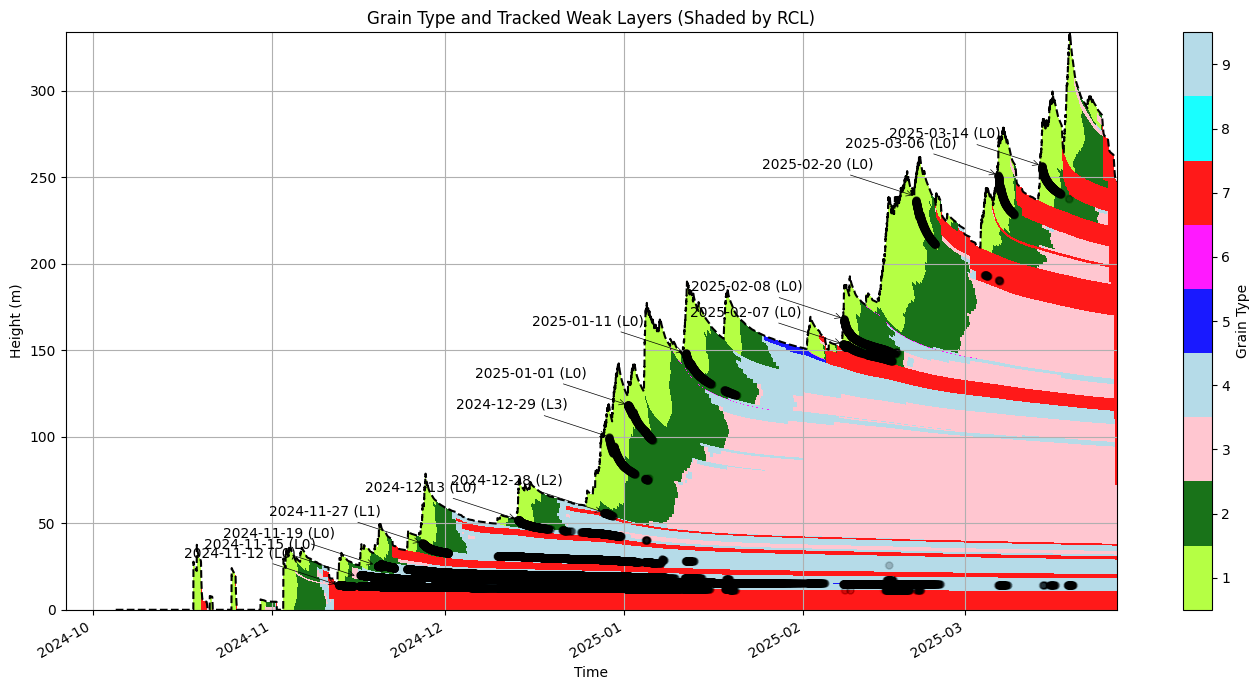

"plot_grain_type_with_weak_layers_3(\n    vars,\n    weak_layers_accum,\n    start_date='2025-01-15',\n    end_date='2025-02-10',\n    fig_name='weak_layers_jan_feb.png'\n)"

In [ ]:
# Full season:
plot_grain_type_with_weak_layers_4(vars, weak_layers_accum)




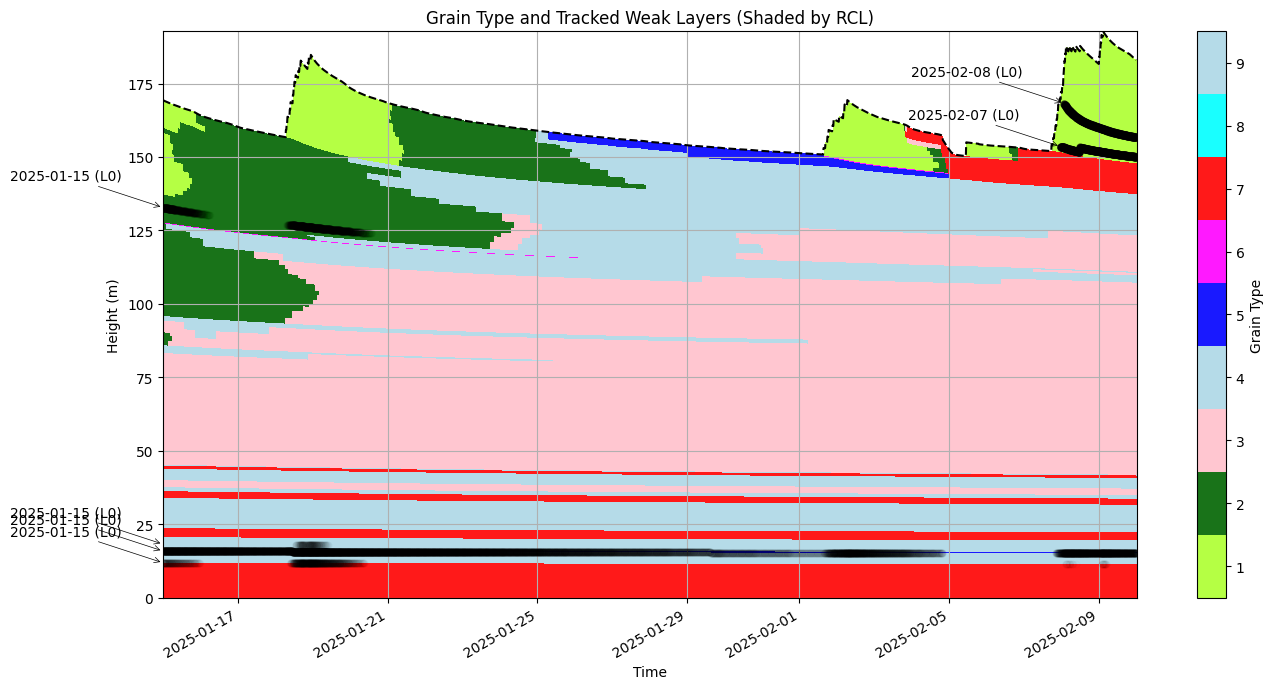

In [8]:
# Focused zoom:
plot_grain_type_with_weak_layers_4(
    vars,
    weak_layers_accum,
    start_date='2025-01-15',
    end_date='2025-02-10',
    fig_name='weak_layers_jan_feb.png'
)